In [9]:
import numpy as np
import tensorflow as tf
import pandas as pd

C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Zad.
Wczytaj dane i narysuj je na wykresie.

In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# Zawsze unrmuj dane

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
housing_data_scaled=scaler.fit_transform(housing.data)

In [17]:
X_train =  housing_data_scaled
y_train = housing.target.reshape(-1, 1)

# Zad 
Wykonaj regresię za pomocą Scikit-Learn.

In [18]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(np.r_[lin_reg.intercept_.reshape(-1, 1), lin_reg.coef_.T])

[[ 2.06855817]
 [ 0.8296193 ]
 [ 0.11875165]
 [-0.26552688]
 [ 0.30569623]
 [-0.004503  ]
 [-0.03932627]
 [-0.89988565]
 [-0.870541  ]]


# Zad.
Proszę narysować wykres zmiany funkcji kosztu w przypadku:
  * Gradient Descent
  * Momentum

In [19]:
data_plus_bias  = np.c_[np.ones((X_train.shape[0], 1)), X_train]
data_m, data_n = data_plus_bias.shape
print(data_m, data_n)

20640 9


In [28]:
tf.reset_default_graph()

n_epochs = 100
batch_size = 64
learning_rate = 0.01

error_array_g_b=[]
error_array_m_b=[]

batch_error_array_g=[]
batch_error_array_m=[]

X = tf.placeholder(tf.float32, shape=(None, data_n), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()



n_batches = int(np.ceil(data_m / batch_size))

def fetch_batch(epoch, batch_index, batch_size, m):
    np.random.seed(epoch * n_batches + batch_index)  
    indices = np.random.randint(m, size=batch_size)  
    X_batch = data_plus_bias[indices] 
    y_batch = y_train[indices] 
    return X_batch, y_batch

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size, data_m)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 10 == 0:
            print("Epoch", epoch, "MSE =", sess.run( mse, feed_dict={X: X_batch, y: y_batch}) )   
        
        batch_error_array_g.append( sess.run( mse, feed_dict={X: X_batch, y: y_batch}) )
        error_array_g_b.append( sess.run( mse, feed_dict={X: data_plus_bias, y: y_train}) )            
    
    best_theta_g = theta.eval()
    save_path = saver.save(sess, "/tmp/my_model_final_g.ckpt")
    
print("Best theta:")
print(best_theta_g)

Epoch 0 MSE = 0.31841922
Epoch 10 MSE = 0.800185
Epoch 20 MSE = 0.5560062
Epoch 30 MSE = 0.4475309
Epoch 40 MSE = 0.54900646
Epoch 50 MSE = 0.80266595
Epoch 60 MSE = 0.55392677
Epoch 70 MSE = 0.43071902
Epoch 80 MSE = 0.27837256
Epoch 90 MSE = 0.70542157
Best theta:
[[ 2.0728784 ]
 [ 0.8359189 ]
 [ 0.11120823]
 [-0.25528795]
 [ 0.29422897]
 [-0.00615538]
 [-0.04408351]
 [-0.9086386 ]
 [-0.8651398 ]]


In [29]:
tf.reset_default_graph()

n_epochs = 100
batch_size = 64
learning_rate = 0.01

X = tf.placeholder(tf.float32, shape=(None, data_n), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

theta = tf.Variable(tf.random_uniform([data_n, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y
mse = tf.reduce_mean(tf.square(error), name="mse")
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()



n_batches = int(np.ceil(data_m / batch_size))

def fetch_batch(epoch, batch_index, batch_size, m):
    np.random.seed(epoch * n_batches + batch_index)  
    indices = np.random.randint(m, size=batch_size)  
    X_batch = data_plus_bias[indices] 
    y_batch = y_train[indices] 
    return X_batch, y_batch

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size, data_m)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if epoch % 10 == 0:
            print("Epoch", epoch, "MSE =", sess.run( mse, feed_dict={X: X_batch, y: y_batch}) )   
        
        batch_error_array_m.append( sess.run( mse, feed_dict={X: X_batch, y: y_batch}) )
        error_array_m_b.append( sess.run( mse, feed_dict={X: data_plus_bias, y: y_train}) )            
    
    best_theta_m = theta.eval()
    save_path = saver.save(sess, "/tmp/my_model_final_m.ckpt")
    
print("Best theta:")
print(best_theta_m)

Epoch 0 MSE = 0.3193664
Epoch 10 MSE = 0.825212
Epoch 20 MSE = 0.55809486
Epoch 30 MSE = 0.44958508
Epoch 40 MSE = 0.5506552
Epoch 50 MSE = 0.8193314
Epoch 60 MSE = 0.55270284
Epoch 70 MSE = 0.4358615
Epoch 80 MSE = 0.28645816
Epoch 90 MSE = 0.712865
Best theta:
[[ 2.074911  ]
 [ 0.8388018 ]
 [ 0.10857785]
 [-0.25526878]
 [ 0.29728356]
 [-0.00648433]
 [-0.05950951]
 [-0.918623  ]
 [-0.8676465 ]]


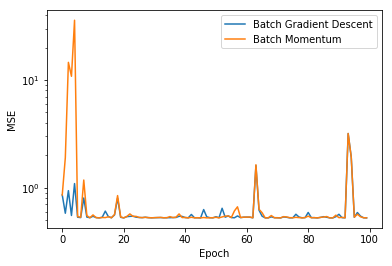

In [30]:
import matplotlib.pyplot as plt

plt.figure()
plt.semilogy(error_array_g_b, label='Batch Gradient Descent')
plt.semilogy(error_array_m_b, label='Batch Momentum')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

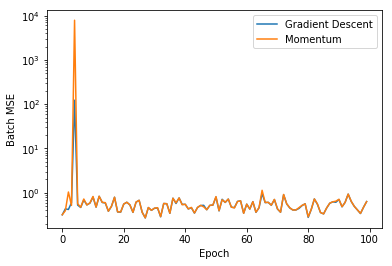

In [31]:
plt.figure()
plt.semilogy(batch_error_array_g, label='Gradient Descent')
plt.semilogy(batch_error_array_m, label='Momentum')
plt.xlabel('Epoch')
plt.ylabel('Batch MSE')
plt.legend()
plt.show()